In [1]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import scipy
from PIL import Image

In [2]:
print("Versions")
print(f"tensorflow : {tf.__version__}")
print(f"numpy : {np.__version__}")
print(f"opencv : {cv2.__version__}")

Versions
tensorflow : 2.13.0
numpy : 1.24.3
opencv : 4.8.1


# Data Set - Visualising the data

In [3]:
os.listdir('cats_dogs/train/dogs')

['dog_0.jpg',
 'dog_10.jpg',
 'dog_100.jpg',
 'dog_102.jpg',
 'dog_103.jpg',
 'dog_106.jpg',
 'dog_109.jpg',
 'dog_11.jpg',
 'dog_110.jpg',
 'dog_113.jpg',
 'dog_116.jpg',
 'dog_120.jpg',
 'dog_122.jpg',
 'dog_125.jpg',
 'dog_128.jpg',
 'dog_129.jpg',
 'dog_13.jpg',
 'dog_133.jpg',
 'dog_136.jpg',
 'dog_138.jpg',
 'dog_139.jpg',
 'dog_140.jpg',
 'dog_144.jpg',
 'dog_145.jpg',
 'dog_15.jpg',
 'dog_151.jpg',
 'dog_152.jpg',
 'dog_154.jpg',
 'dog_156.jpg',
 'dog_162.jpg',
 'dog_164.jpg',
 'dog_165.jpg',
 'dog_167.jpg',
 'dog_171.jpg',
 'dog_175.jpg',
 'dog_178.jpg',
 'dog_182.jpg',
 'dog_186.jpg',
 'dog_188.jpg',
 'dog_192.jpg',
 'dog_193.jpg',
 'dog_195.jpg',
 'dog_199.jpg',
 'dog_200.jpg',
 'dog_202.jpg',
 'dog_203.jpg',
 'dog_204.jpg',
 'dog_205.jpg',
 'dog_206.jpg',
 'dog_207.jpg',
 'dog_208.jpg',
 'dog_209.jpg',
 'dog_21.jpg',
 'dog_212.jpg',
 'dog_214.jpg',
 'dog_216.jpg',
 'dog_217.jpg',
 'dog_218.jpg',
 'dog_22.jpg',
 'dog_220.jpg',
 'dog_221.jpg',
 'dog_224.jpg',
 'dog_226.jpg',


In [4]:
def walk_through_dir(root_folder_path):
    for (dir_path,dir_names,file_names) in os.walk(root_folder_path):
        print(f'There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}')
  
walk_through_dir('cats_dogs')  

There are 2 directories and 0 images in cats_dogs
There are 2 directories and 0 images in cats_dogs\test
There are 0 directories and 70 images in cats_dogs\test\cats
There are 0 directories and 70 images in cats_dogs\test\dogs
There are 2 directories and 0 images in cats_dogs\train
There are 0 directories and 279 images in cats_dogs\train\cats
There are 0 directories and 278 images in cats_dogs\train\dogs


In [5]:
def view_random_image(target_dir,target_class):
    
    '''
    View some random images of the target_class from the train/test dataset(target_dir).
    
    Arguments:
        target_dir: (str) the train_data_path or the test_data_path
        target_class: (str) the name of the class inside whoose image is to be viewed randomly
        
    '''
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import random
    import os
    import cv2
    
    target_folder = target_dir + "/" + target_class
    
    #get a sample random image from the the target_folder
    random_image = random.sample(os.listdir(target_folder), 1)
    
    #plot and visualise the image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    # show the shape of the image
    print(f"Image shape: {img.shape}") 

Image shape: (630, 1200, 3)


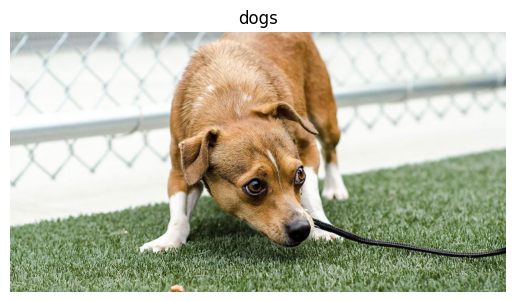

In [6]:
view_random_image('cats_dogs/train','dogs')

# Preprocess Images

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_path = 'cats_dogs/train'
test_data_path = 'cats_dogs/test'

train_data_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_data_path,
                                                                          batch_size = 64,
                                                                          target_size = (224,224),
                                                                          seed = 42,
                                                                          class_mode = "categorical",
                                                                          shuffle = "True")
test_data_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_data_path,
                                                                          batch_size = 64,
                                                                          target_size = (224,224),
                                                                          class_mode = "categorical",
                                                                          seed = 42,
                                                                          shuffle = "True")

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


# Model

In [8]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           input_shape = (224,224,3),
                           activation = "relu",),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu"),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2,activation = "softmax")
],name = "model_1")

In [9]:
model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = "Adam",
    metrics=["accuracy"]
)

In [10]:
history  = model_1.fit(
    train_data_gen,
    epochs = 10,
    steps_per_epoch = len(train_data_gen),
    validation_data = test_data_gen,
    validation_steps = len(test_data_gen),
)

history

Epoch 1/10
9/9 [==============================] - 23s 2s/step - loss: 0.7273 - accuracy: 0.5171 - val_loss: 0.7026 - val_accuracy: 0.4714
Epoch 2/10
9/9 [==============================] - 20s 2s/step - loss: 0.6875 - accuracy: 0.5314 - val_loss: 0.6935 - val_accuracy: 0.4929
Epoch 3/10
9/9 [==============================] - 17s 2s/step - loss: 0.6733 - accuracy: 0.6732 - val_loss: 0.6820 - val_accuracy: 0.6214
Epoch 4/10
9/9 [==============================] - 20s 2s/step - loss: 0.6551 - accuracy: 0.6391 - val_loss: 0.6801 - val_accuracy: 0.5429
Epoch 5/10
9/9 [==============================] - 16s 2s/step - loss: 0.6254 - accuracy: 0.7127 - val_loss: 0.6703 - val_accuracy: 0.6000
Epoch 6/10
9/9 [==============================] - 21s 2s/step - loss: 0.5787 - accuracy: 0.6948 - val_loss: 0.6559 - val_accuracy: 0.6571
Epoch 7/10
9/9 [==============================] - 21s 2s/step - loss: 0.5062 - accuracy: 0.7469 - val_loss: 0.6859 - val_accuracy: 0.5714
Epoch 8/10
9/9 [==================

In [11]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                      

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
img = tf.io.read_file('/content/images (4).jpeg')
img = tf.image.decode_jpeg(img)
#img = tf.image.resize(img, [img_shape, img_shape])
img = tf.image.resize(img, (224,224))
img = img/255.
plt.imshow(img)
plt.axis('off')
prediction = model_1.predict(tf.expand_dims(img,axis = 0))
tf.squeeze(prediction)

NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} NewRandomAccessFile failed to Create/Open: /content/images (4).jpeg : The system cannot find the path specified.
; No such process [Op:ReadFile]

In [31]:
from PIL import Image
import requests

my_url = ['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2p8fQSx7TVFdHTpfgEi46bKhuNhguV6_SRnhPBm5wHtpFrBa-uKjcO7O2Ig&s']

index = 0

my_img = Image.open(requests.get(my_url[index], stream=True).raw)
my_img = tf.image.resize(my_img, (224,224))
my_img = my_img/255.

prediction = model_1.predict(tf.expand_dims(my_img,axis = 0))
prediction = tf.squeeze(prediction)
print(prediction)


plt.imshow(my_img)

ConnectionError: HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn:ANd9GcQ2p8fQSx7TVFdHTpfgEi46bKhuNhguV6_SRnhPBm5wHtpFrBa-uKjcO7O2Ig&s (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000220900743D0>: Failed to resolve 'encrypted-tbn0.gstatic.com' ([Errno 11001] getaddrinfo failed)"))